In [34]:
import folium

def create_folium_plot(coord1, coord2):
    # Create a folium map centered at the first coordinate
    map_center = [coord1[0], coord1[1]]
    m = folium.Map(location=map_center, zoom_start=2)

    # Add markers for the two coordinates
    folium.Marker(coord1, popup='Coordinate 1').add_to(m)
    folium.Marker(coord2, popup='Coordinate 2').add_to(m)

    # Create a line between the two coordinates
    folium.PolyLine([coord1, coord2], color='blue', weight=2.5, opacity=1).add_to(m)

    # Calculate the longitude difference between the two coordinates
    lon_diff = coord2[1] - coord1[1]

    # Create a parallel line to the equator passing through the first coordinate
    parallel_line = [[coord1[0], coord1[1]], [coord1[0], coord1[1] + lon_diff]]

    # Add the parallel line to the map
    folium.PolyLine(parallel_line, color='red', weight=2.5, opacity=1).add_to(m)

    # Create a line connecting coord1 and the end of the parallel line to form a triangle
    triangle_line = [coord1, parallel_line[1]]

    # Add the triangle line to the map
    folium.PolyLine(triangle_line, color='green', weight=2.5, opacity=1).add_to(m)

    # Return the map object
    return m

coord1 = [40.7128, -74.0060]  # Latitude and longitude of coordinate 1
coord2 = [51.5074, -0.1278]   # Latitude and longitude of coordinate 2

# Create the folium plot
folium_map = create_folium_plot(coord1, coord2)

# Display the map in Jupyter Notebook
folium_map


In [15]:
folium_map.show()

AttributeError: 'Map' object has no attribute 'show'

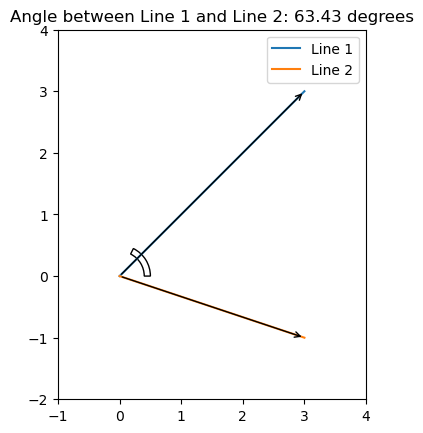

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Define the lines
line1 = np.array([[0, 0], [3, 3]])
line2 = np.array([[0, 0], [3, -1]])

# Calculate the angle between the lines
angle = np.degrees(np.arccos(np.dot(line1[1] - line1[0], line2[1] - line2[0]) /
                             (np.linalg.norm(line1[1] - line1[0]) *
                              np.linalg.norm(line2[1] - line2[0]))))

# Plot the lines and the wedge
fig, ax = plt.subplots()

ax.plot(line1[:, 0], line1[:, 1], label='Line 1')
ax.plot(line2[:, 0], line2[:, 1], label='Line 2')

ax.annotate('', xy=line1[1], xytext=line1[0], arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=line2[1], xytext=line2[0], arrowprops=dict(arrowstyle='->'))

wedge = Wedge(line1[0], 0.5, 0, angle, width=0.1, fill=False)
ax.add_artist(wedge)

# Set plot options
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([-1, 4])
ax.set_ylim([-2, 4])
ax.legend()
plt.title(f'Angle between Line 1 and Line 2: {angle:.2f} degrees')

# Show the plot
plt.show()


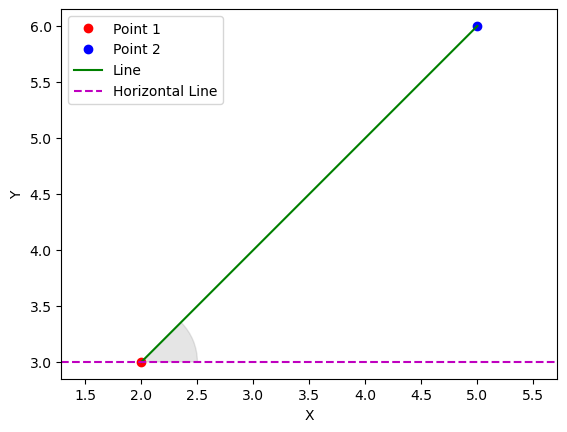

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def calculate_angle(x1, y1, x2, y2):
    # Calculate the angle between the two lines
    dx1 = x2 - x1
    dy1 = y2 - y1
    angle_rad = np.arctan2(dy1, dx1)
    angle_deg = np.degrees(angle_rad)
    return angle_deg

def plot_points_lines_and_sector(x1, y1, x2, y2):
    # Plotting the points and lines
    plt.plot(x1, y1, 'ro', label='Point 1')
    plt.plot(x2, y2, 'bo', label='Point 2')
    plt.plot([x1, x2], [y1, y2], 'g-', label='Line')
    plt.axhline(y=y1, color='m', linestyle='--', label='Horizontal Line')

    # Calculate the angle
    angle_deg = calculate_angle(x1, y1, x2, y2)

    # Create the wedge representing the sector
    center = (x1, y1)
    radius = 0.5  # Adjust the radius of the sector as needed
    wedge = patches.Wedge(center, radius, 0, angle_deg, alpha=0.2, color='gray')

    # Add the wedge to the plot
    ax = plt.gca()
    ax.add_patch(wedge)

    # Adding labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    # Displaying the plot
    plt.axis('equal')  # Ensure the plot axes are equal for a circular sector
    plt.show()

# Example usage
x1 = 2
y1 = 3
x2 = 5
y2 = 6

plot_points_lines_and_sector(x1, y1, x2, y2)


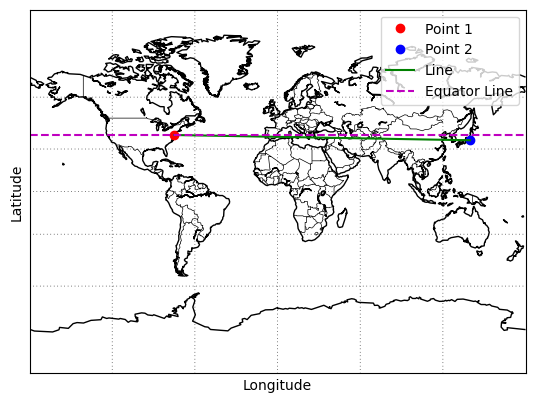

In [42]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def calculate_angle(lon1, lat1, lon2, lat2):
    # Calculate the angle between the two lines
    dx1 = lon2 - lon1
    dy1 = lat2 - lat1
    angle_rad = np.arctan2(dy1, dx1)
    angle_deg = np.degrees(angle_rad)
    return angle_deg

def plot_points_lines_and_sector(lon1, lat1, lon2, lat2):
    # Create a Basemap instance for the world map
    map = Basemap(projection='mill', lon_0=0)

    # Draw the coastlines, countries, parallels, and meridians
    map.drawcoastlines()
    map.drawcountries()
    map.drawparallels(range(-90, 91, 30), linewidth=0.5, dashes=[1, 4])
    map.drawmeridians(range(-180, 181, 60), linewidth=0.5, dashes=[1, 4])

    # Convert coordinates to map projection
    x1, y1 = map(lon1, lat1)
    x2, y2 = map(lon2, lat2)

    # Plot the points on the map
    map.plot(x1, y1, 'ro', label='Point 1')
    map.plot(x2, y2, 'bo', label='Point 2')

    # Draw a line between the points
    map.plot([x1, x2], [y1, y2], 'g-', label='Line')

    # Draw a line parallel to the equator passing through the first point
    eq_lon = np.linspace(-180, 180, 100)
    eq_lat = np.full_like(eq_lon, lat1)
    eq_x, eq_y = map(eq_lon, eq_lat)
    map.plot(eq_x, eq_y, 'm--', label='Equator Line')

    # Calculate the angle
    angle_deg = calculate_angle(lon1, lat1, lon2, lat2)

    # Create the wedge representing the sector
    center = (x1, y1)
    radius = 0.2  # Adjust the radius of the sector as needed
    wedge = patches.Wedge(center, radius, 0, angle_deg, alpha=0.2, color='gray')

    # Add the wedge to the plot
    ax = plt.gca()
    ax.add_patch(wedge)

    # Adding labels and legend
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()

    # Displaying the plot
    plt.show()

# Example usage
lon1 = -75.0
lat1 = 39.0
lon2 = 139.6917
lat2 = 35.6895

plot_points_lines_and_sector(lon1, lat1, lon2, lat2)


In [87]:
import folium
import numpy as np
import math
from folium.plugins import SemiCircle

def calculate_angle(lon1, lat1, lon2, lat2):
    # Calculate the angle between the two lines
    dx1 = lon2 - lon1
    dy1 = lat2 - lat1
    angle_rad = math.atan2(dy1, dx1)
    angle_deg = math.degrees(angle_rad)
    if angle_deg < 0:
        angle_deg += 0  # Adjust negative angles to positive
    return angle_deg

def plot_points_lines_and_sector(lon1, lat1, lon2, lat2):
    # Create a Folium map centered at lat1, lon1
    map = folium.Map(location=[lat1, lon1], zoom_start=2)

    # Add markers for the points
    folium.Marker([lat1, lon1], popup='Point 1', icon=folium.Icon(color='red')).add_to(map)
    folium.Marker([lat2, lon2], popup='Point 2', icon=folium.Icon(color='blue')).add_to(map)

    # Calculate the angle
    angle_deg = calculate_angle(lon1, lat1, lon2, lat2)
    print(angle_deg)

    # Create a semicircle sector representing the angle
    semicircle = SemiCircle(
        location=[lat1, lon1],
        radius=100000,
        start_angle= 90 - angle_deg,
        stop_angle= 360 + 90,
        color='gray',
        fill_color='gray',
        fill_opacity=0.2
    )
    map.add_child(semicircle)

    # Draw a line between the points
    line = folium.PolyLine([[lat1, lon1], [lat2, lon2]], color='green')
    map.add_child(line)

    # Move the parallel line to the north, crossing point 1
    parallel_lon = np.linspace(lon1, lon2, 100)
    parallel_line = list(zip([lat1] * len(parallel_lon), parallel_lon))
    folium.PolyLine(parallel_line, color='magenta', dash_array='10,10').add_to(map)

    return map

# Example usage
lon1 = -75.0
lat1 = 69.0
lon2 = 139.6917
lat2 = 15.6895

folium_map = plot_points_lines_and_sector(lon1, lat1, lon2, lat2)
folium_map


-13.945174847303344


In [76]:
help(SemiCircle)

Help on class SemiCircle in module folium.plugins.semicircle:

class SemiCircle(folium.elements.JSCSSMixin, folium.map.Marker)
 |  SemiCircle(location, radius, direction=None, arc=None, start_angle=None, stop_angle=None, popup=None, tooltip=None, **kwargs)
 |  
 |  Add a marker in the shape of a semicircle, similar to the Circle class.
 |  
 |  Use (direction and arc) or (start_angle and stop_angle), not both.
 |  
 |  Parameters
 |  ----------
 |  location: tuple[float, float]
 |      Latitude and Longitude pair (Northing, Easting)
 |  radius: float
 |      Radius of the circle, in meters.
 |  direction: int, default None
 |      Direction angle in degrees
 |  arc: int, default None
 |      Arc angle in degrees.
 |  start_angle: int, default None
 |      Start angle in degrees
 |  stop_angle: int, default None
 |      Stop angle in degrees.
 |  popup: str or folium.Popup, optional
 |      Input text or visualization for object displayed when clicking.
 |  tooltip: str or folium.Toolti

In [88]:
help(np.radians)

Help on ufunc:

radians = <ufunc 'radians'>
    radians(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    
    Convert angles from degrees to radians.
    
    Parameters
    ----------
    x : array_like
        Input array in degrees.
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
        This condition is broadcast over the input. At locations where the
        condition is True, the `out` array will be set to the ufunc result.
        Elsewhere, the `out` array will retain its original value.
        Note that if an uninitialized `out` array is created via the default
        ``

In [92]:
import numpy as np

def angle_between_points(lat1, lon1, lat2, lon2):
    # Convert coordinates to radians
    lat1, lon1 = np.radians([lat1, lon1])
    lat2, lon2 = np.radians([lat2, lon2])

    # Calculate the central angle between the two points
    delta_lon = lon2 - lon1
    central_angle = np.arccos(np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(delta_lon))

    # Calculate the central angle between the first point and the point on the same latitude as the first point but on the longitude of the second point
    lat3 = lat1
    central_angle_latitude = np.arccos(np.sin(lat1) * np.sin(lat3) + np.cos(lat1) * np.cos(lat3) * np.cos(delta_lon))

    # The difference between these angles is the angle you're looking for
    angle = central_angle_latitude - central_angle

    # Return the sine and cosine of the angle
    return np.sin(angle), np.cos(angle)


In [95]:
import folium

def display_coordinates_on_map(latitude, longitude, additional_lat, additional_lon):
    # Create a Folium map centered at the given latitude and longitude
    map = folium.Map()

    # Add markers for the coordinates
    folium.Marker(location=[latitude, longitude]).add_to(map)
    folium.Marker(location=[additional_lat, additional_lon], color='red', icon=folium.Icon(icon='cloud')).add_to(map)

    # Calculate the bounds of the map
    bounds = [[latitude, longitude], [additional_lat, additional_lon]]

    # Fit the map to the calculated bounds
    map.fit_bounds(bounds)

    # Display the map
    return map

# Example usage:
latitude = 40.7128
longitude = -74.0060
FRANKFURT_LAT = 50.037621
FRANKFURT_LON = 8.565197

map = display_coordinates_on_map(latitude, longitude, FRANKFURT_LAT, FRANKFURT_LON)
map


In [129]:
import numpy as np

def calculate_bearing(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Calculate the longitude difference
    delta_lon = lon2_rad - lon1_rad

    # Calculate the bearing
    y = np.sin(delta_lon) * np.cos(lat2_rad)
    x = np.cos(lat1_rad) * np.sin(lat2_rad) - np.sin(lat1_rad) * np.cos(lat2_rad) * np.cos(delta_lon)
    bearing_rad = np.arctan2(y, x)

    # Convert the bearing to degrees
    bearing_deg = np.degrees(bearing_rad)

    # Normalize the bearing to the range of 0 to 360 degrees
    bearing_deg = (bearing_deg + 360) % 360

    return bearing_deg

# Example usage:
lat1 = 40.7128
lon1 = -74.0060
lat2 = 35.6895
lon2 = 139.6917

bearing = calculate_bearing(lat1, lon1, lat2, lon2)
print("Bearing:", bearing)



Bearing: 332.9627658456161


In [131]:
latitude = -50.7128
longitude = 4.0060
FRANKFURT_LAT = 50.037621
FRANKFURT_LON = 8.565197
bearing = calculate_bearing(FRANKFURT_LAT,FRANKFURT_LON,latitude, longitude)
bearing

182.9374127168418

In [127]:
import numpy as np

angle_rad = np.arcsin(sin_value)
angle_rad_2 = np.arccos(cos_value)
angle_deg = np.degrees(angle_rad)
angle_deg_2 = np.degrees(angle_rad_2)
print("Angle in radians:", angle_rad)
print("Angle in degrees:", angle_deg, angle_deg_2)


Angle in radians: -1.4329566063732146
Angle in degrees: -82.10236577057441 97.89763422942563


In [132]:
display_coordinates_on_map(FRANKFURT_LAT,FRANKFURT_LON,latitude, longitude)

In [1]:
import io
from pdfminer.converter import HTMLConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

def convert_pdf_to_html(pdf_path, html_path):
    with open(pdf_path, 'rb') as pdf_file:
        resource_manager = PDFResourceManager()
        output_stream = io.StringIO()
        converter = HTMLConverter(resource_manager, output_stream)
        interpreter = PDFPageInterpreter(resource_manager, converter)

        for page in PDFPage.get_pages(pdf_file):
            interpreter.process_page(page)

        html_content = output_stream.getvalue()

        with open(html_path, 'w', encoding='utf-8') as html_file:
            html_file.write(html_content)

        output_stream.close()

# Usage example
pdf_path = 'input.pdf'
html_path = 'output.html'
convert_pdf_to_html(pdf_path, html_path)


ModuleNotFoundError: No module named 'pdfminer'